### Field enhancement by silver and gold nanoparticles

This notebook includes a preliminary investigation of the scattering, absorption and extinction cross sections and the Mie scattering implementations in mie_functions. In particular, the notebook studies the validity of an electric dipole approximation for the Mie coefficients (i.e. truncation of the Mie series to just $a_1$ + neglecting all magnetic terms). It is found that the electric dipole approximation performs very well for the two main nanoparticle materials studied in this project: silver and gold. 

The notebook also illustrates the important trade-off between high scattering and high absorption as ellucidated by the plots of the scattering and absorption cross-sections of for the two materials. Although the absorption cross-section of gold peaks further away from the resonance wavelength of this material (in comparison with silver), it has  a much higher relative value compared to the scattering cross-section of the material. Therefore, gold nanospheres are expected to lead to enhance the field less than silver ones, and silver is ruled out to be the better choice for this project. In addition, the radius of the nanoparticle also plays a role - a smaller radius will lead to higher field enhancement, but also to a faster decay rate.

In [1]:
from scipy import special as sp
import numpy as np
import matplotlib.pyplot as plt
import miepython
import pandas as pd
import csv

from ipynb.fs.full.mie_functions import *

### $\textit{Importing data}$

In [2]:
# Import data for silver (Ag)
# from https://refractiveindex.info/?shelf=main&book=Ag&page=McPeak
ref_lam_silver, ref_n_silver, ref_k_silver = import_data("McPeak_silver.csv")

In [3]:
# Import data for gold (Au)
# from https://refractiveindex.info/?shelf=main&book=Au&page=McPeak
ref_lam_gold, ref_n_gold, ref_k_gold = import_data("McPeak_gold.csv")

### $\textit{Parameters}$

In [4]:
# Define parameters
a = 0.01  # radius in micrometers
cross_section_area = np.pi * (a ** 2)

# Silver
m_silver = ref_n_silver + 1.0j * ref_k_silver   # index of refraction
mu_a_silver = 4 * np.pi * ref_k_silver / ref_lam_silver    # nm
k_silver = wavenumber(ref_lam_silver, 1)    

# Gold
m_gold = ref_n_gold + 1.0j * ref_k_gold   # index of refraction
mu_a_gold = 4 * np.pi * ref_k_gold / ref_lam_gold    # nm
k_gold = wavenumber(ref_lam_gold, 1)  

In [5]:
# Arguments for the Bessel and Hankel functions

#Silver
x_silver = k_silver * a
y_silver = m_silver * k_silver * a

#Gold
x_gold = k_gold * a
y_gold = m_gold * k_gold * a

### $\textit{Mie coefficients}$

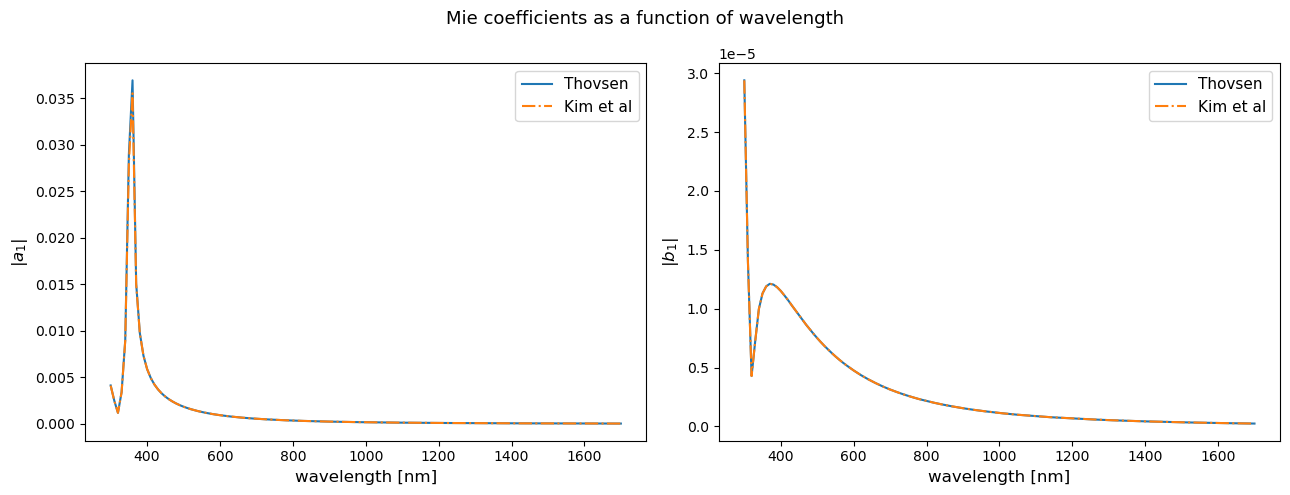

In [6]:
# Check that results from different expressions of Mie coefficients coincide: NOTE - a and b coeffs exchenged
# in Kim et al expressions

r = 0.01

A_list_thov, B_list_thov = a_1_b_1_lists(m_silver, ref_lam_silver, r, n = 1, order = 1, YSK = False, Thovsen = True)
A_list_kim, B_list_kim = a_1_b_1_lists(m_silver, ref_lam_silver, r, n = 1, order = 1, YSK = True, Thovsen = False)

fig, ax = plt.subplots(1,2, figsize = (13, 5), layout = 'tight')
ax[0].plot(ref_lam_silver*1e3, np.abs(A_list_thov), label = 'Thovsen')
ax[0].plot(ref_lam_silver*1e3, np.abs(A_list_kim), linestyle = '-.', label = 'Kim et al')
ax[1].plot(ref_lam_silver*1e3, np.abs(B_list_thov), label = 'Thovsen')
ax[1].plot(ref_lam_silver*1e3, np.abs(B_list_kim), linestyle = '-.', label = 'Kim et al')


ax[0].set_ylabel('$|a_1|$', fontsize=12)
ax[1].set_ylabel('$|b_1|$', fontsize=12)
ax[0].set_xlabel('wavelength [nm]', fontsize=12)
ax[1].set_xlabel('wavelength [nm]', fontsize=12)
fig.suptitle('Mie coefficients as a function of wavelength', fontsize=13)
ax[0].legend(fontsize=11)
ax[1].legend(fontsize=11)

plt.show()

### $\textit{Numerical solution}$

In [7]:
# Numerical estimate of scattering cross-section
# from https://miepython.readthedocs.io/en/latest/

# Silver
qext_silver, qsca_silver, qback_silver, g_silver = miepython.mie(m_silver, x_silver)
sca_cross_section_silver = qsca_silver * cross_section_area
ext_cross_section_silver = qext_silver * cross_section_area
abs_cross_section_silver = (qext_silver - qsca_silver) * cross_section_area

# Gold
qext_gold, qsca_gold, qback_gold, g_gold = miepython.mie(m_gold, x_gold)
sca_cross_section_gold = qsca_gold * cross_section_area
ext_cross_section_gold = qext_gold * cross_section_area
abs_cross_section_gold = (qext_gold - qsca_gold) * cross_section_area

### $\textit{Analytical solution with dipole approximation}$

In [8]:
# Find coefficients 

# Silver
a_1_silver, b_1_silver = a_1_b_1_lists(m_silver, ref_lam_silver, a, YSK = True, wiki = False, Thovsen = False)

# Gold
a_1_gold, b_1_gold = a_1_b_1_lists(m_gold, ref_lam_gold, a, YSK = True, wiki = False, Thovsen = False)

In [9]:
# Find scattering, extinction and absorption cross-sections for imported data
# Variables indexed with 'an' store analytical solutions with both electric and magnetic dipole terms, while 
# variables indexed with 'no_mag' neglect the magnetic dipole term.

# Silver
sca_cross_section_an_silver = sca_cross_section_analytical(a_1_silver, b_1_silver, ref_lam_silver)
sca_cross_section_no_mag_silver = sca_cross_section_analytical(a_1_silver, 0, ref_lam_silver)

ext_cross_section_an_silver = ext_cross_section_analytical(a_1_silver, b_1_silver, ref_lam_silver)
ext_cross_section_no_mag_silver = ext_cross_section_analytical(a_1_silver, 0, ref_lam_silver)

abs_cross_section_an_silver = ext_cross_section_an_silver - sca_cross_section_an_silver
abs_cross_section_no_mag_silver = ext_cross_section_no_mag_silver - sca_cross_section_no_mag_silver

# Gold
sca_cross_section_an_gold = sca_cross_section_analytical(a_1_gold, b_1_gold, ref_lam_gold)
sca_cross_section_no_mag_gold = sca_cross_section_analytical(a_1_gold, 0, ref_lam_gold)

ext_cross_section_an_gold = ext_cross_section_analytical(a_1_gold, b_1_gold, ref_lam_gold)
ext_cross_section_no_mag_gold = ext_cross_section_analytical(a_1_gold, 0, ref_lam_gold)

abs_cross_section_an_gold = ext_cross_section_an_gold - sca_cross_section_an_gold
abs_cross_section_no_mag_gold = ext_cross_section_no_mag_gold - sca_cross_section_no_mag_gold

### $\textit{Plotting cross sections: Silver}$

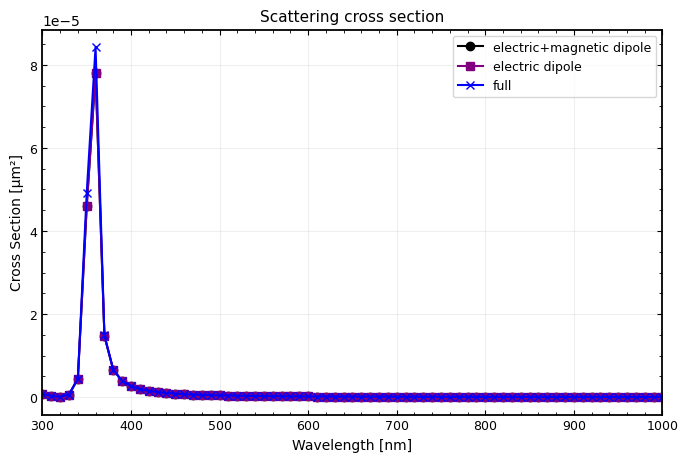

In [10]:
# Numerical and analytical absorption cross-sections with and without magnetic dipole term
#plot_cross_section(ref_lam_silver, sca_cross_section_an_silver,
#                   sca_cross_section_an_silver_ysk, sca_cross_section_silver, label1 = 'dipole, ysk',
#                   figtitle = 'Scattering cross section', label2 = 'dipole, thov', savefig = True, 
#                   savefigtitle = 'scattering_approximation_plot_Ag.jpg')

plot_cross_section(ref_lam_silver, sca_cross_section_an_silver,
                   sca_cross_section_no_mag_silver, sca_cross_section_silver, label1 = 'electric+magnetic dipole',
                   label3 = 'full', label2 = 'electric dipole',
                   figtitle = 'Scattering cross section', savefig = True, 
                   savefigtitle = 'scattering_approximation_plot_Ag.jpg')

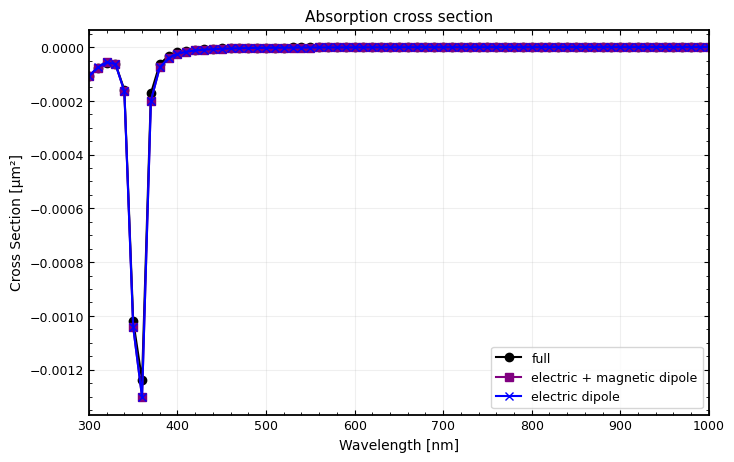

In [11]:
# Numerical and analytical absorption cross-sections with and without magnetic dipole term
plot_cross_section(ref_lam_silver, abs_cross_section_silver, abs_cross_section_an_silver, 
                   abs_cross_section_no_mag_silver, figtitle = 'Absorption cross section', savefig = True, 
                   savefigtitle = 'absorption_approximation_plot_Ag.jpg')

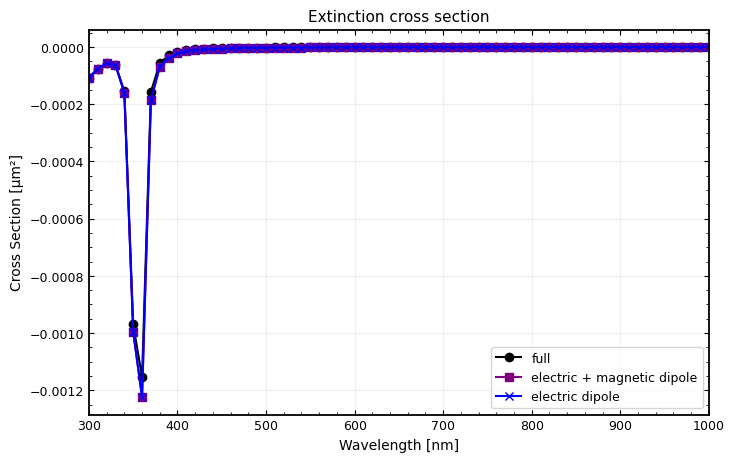

In [12]:
# Numerical and approximated analytical extinction cross-sections with and without magnetic dipole term
plot_cross_section(ref_lam_silver, ext_cross_section_silver, ext_cross_section_an_silver, 
                   ext_cross_section_no_mag_silver, figtitle = 'Extinction cross section', savefig = True, 
                   savefigtitle = 'extinction_approximation_plot_Ag.jpg')

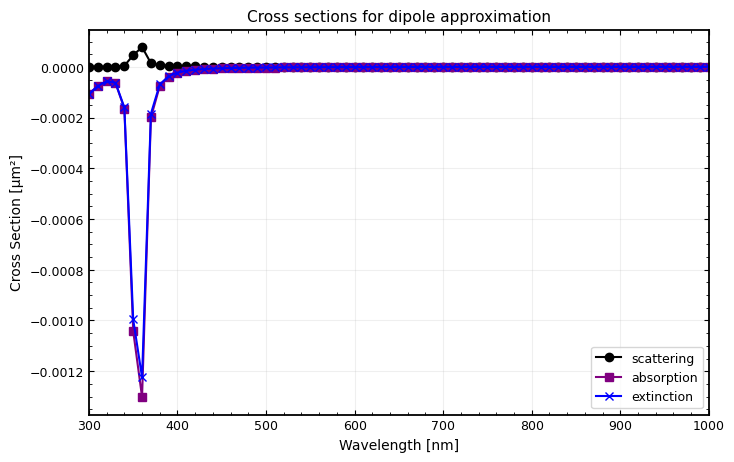

In [13]:
# Plot all three analytical cross-sections
plot_cross_section(ref_lam_silver, sca_cross_section_no_mag_silver, abs_cross_section_no_mag_silver, 
                   ext_cross_section_no_mag_silver, label1 = 'scattering', label2 = 'absorption', 
                   label3 = 'extinction', figtitle = 'Cross sections for dipole approximation')

### $\textit{Plotting cross sections: Gold}$

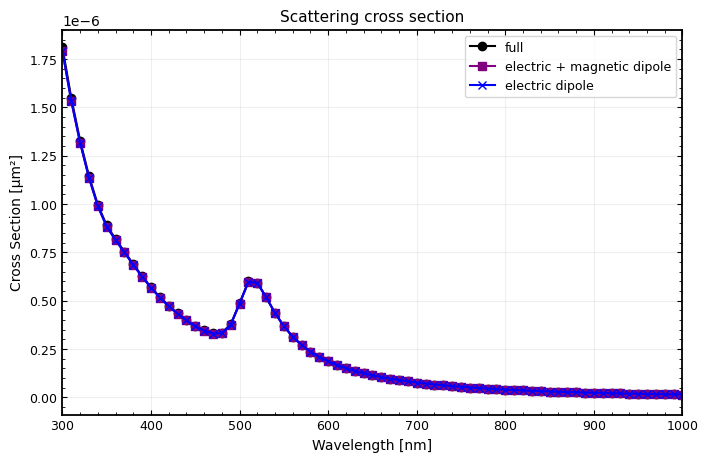

In [14]:
# Numerical and analytical absorption cross-sections with and without magnetic dipole term
plot_cross_section(ref_lam_gold, sca_cross_section_gold, sca_cross_section_an_gold, 
                   sca_cross_section_no_mag_gold, figtitle = 'Scattering cross section', 
                   savefig = True, savefigtitle = 'scattering_approximation_plot_Au.jpg')

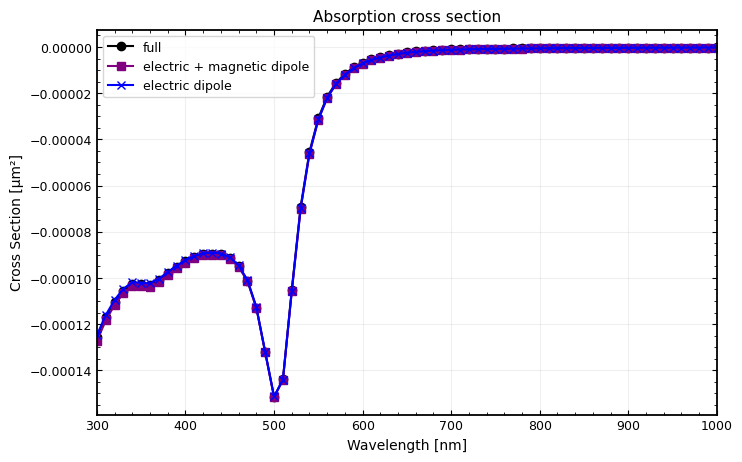

In [15]:
# Numerical and analytical absorption cross-sections with and without magnetic dipole term
plot_cross_section(ref_lam_gold, abs_cross_section_gold, abs_cross_section_an_gold, 
                   abs_cross_section_no_mag_gold, figtitle = 'Absorption cross section', 
                   savefig = True, savefigtitle = 'absorption_approximation_plot_Au.jpg')

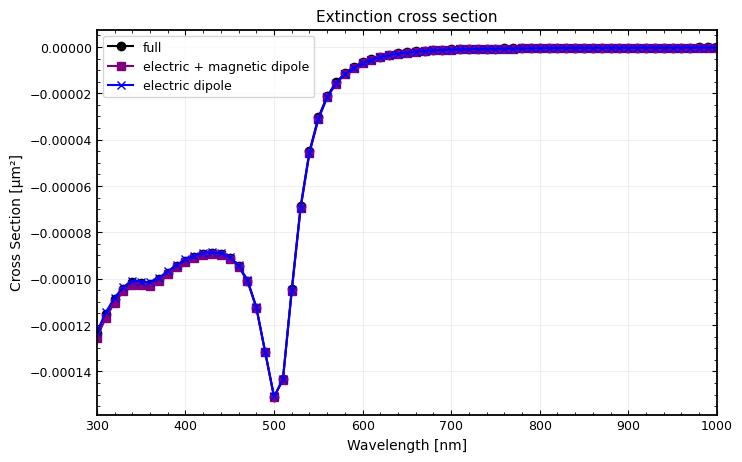

In [16]:
# Numerical and approximated analytical extinction cross-sections with and without magnetic dipole term
plot_cross_section(ref_lam_gold, ext_cross_section_gold, ext_cross_section_an_gold, 
                   ext_cross_section_no_mag_gold, figtitle = 'Extinction cross section', 
                   savefig = True, savefigtitle = 'extinction_approximation_plot_Au.jpg')

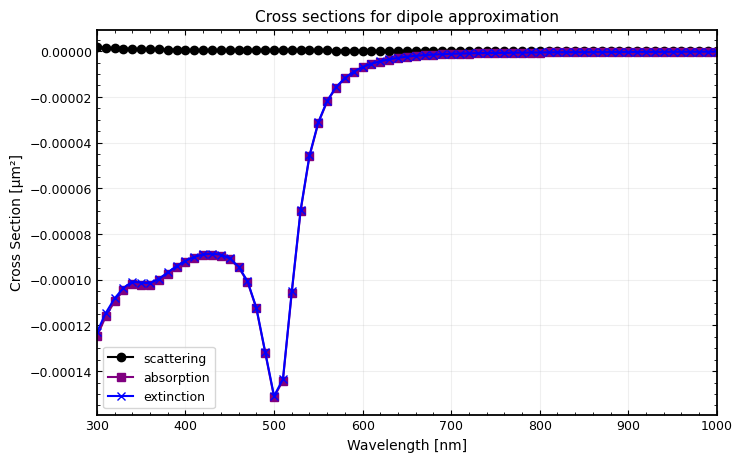

In [17]:
# Plot all three analytical cross-sections
plot_cross_section(ref_lam_gold, sca_cross_section_no_mag_gold, abs_cross_section_no_mag_gold, 
                   ext_cross_section_no_mag_gold, label1 = 'scattering', label2 = 'absorption', 
                   label3 = 'extinction', figtitle = 'Cross sections for dipole approximation')

### $\textit{Plotting scattered field: Silver at resonance}$

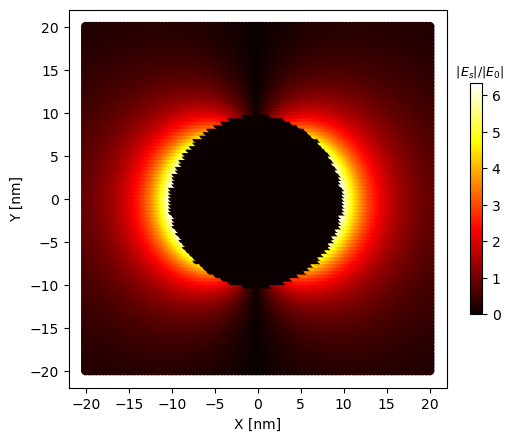

('At incoming wavelength of 380.0 nm',
 'Maximum scattered field = 6.327986391941846 E_0')

In [18]:
x_points = np.linspace(-20.0,20.0,100) #nm
y_points = np.linspace(-20.0,20.0,100) #nm

plot_scattered_field(x_points, y_points, 1e-15, m_silver, lam_list = ref_lam_silver, lam_value = 0.38, r = a,
                     filename = 'enhancement_r_10_silver.txt', n = 1, figsize = [6.1,6])

### $\textit{Scattering in all three planes: gold}$

Note: the convention throughout this project is to align the z-axis with the propagation of the incident light and to take light polarisation along the x-axis.

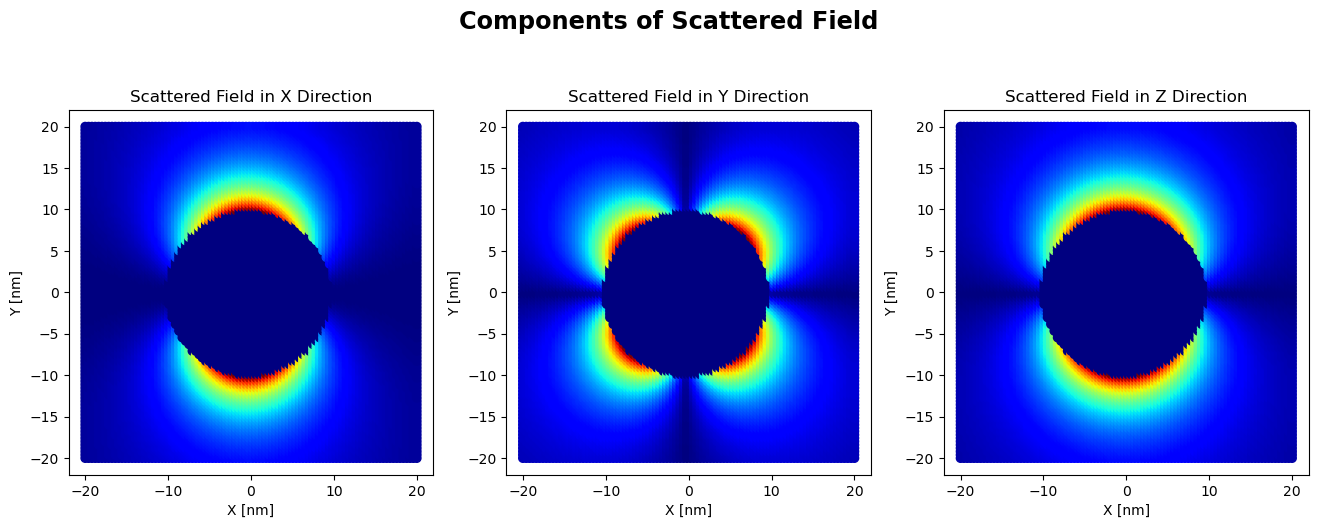

(array([0.04960814, 0.04998061, 0.05031207, ..., 0.05031207, 0.04998061,
        0.04960814]),
 array([0.05253107, 0.05399771, 0.05548324, ..., 0.05548324, 0.05399771,
        0.05253107]),
 array([4.54895951e-18, 4.62897356e-18, 4.70854217e-18, ...,
        4.70854217e-18, 4.62897356e-18, 4.54895951e-18]))

In [19]:
x_points = np.linspace(-20.0,20.0,100) #nm
y_points = np.linspace(-20.0,20.0,100) #nm
scattered_field_components(x_points, y_points, 1e-15, m_gold, ref_lam_gold, a, lam_value = 0.38, plot = True)

### $\textit{Plotting scattered field: Gold at resonance}$

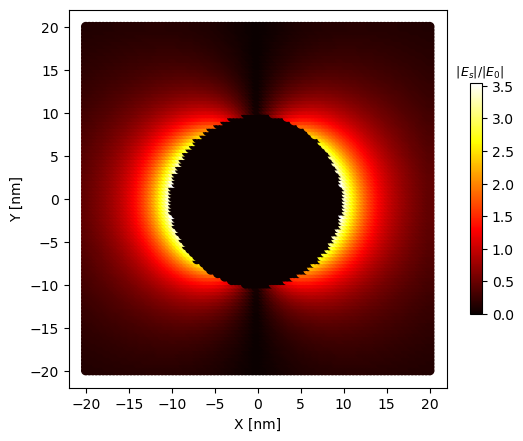

('At incoming wavelength of 520.0 nm',
 'Maximum scattered field = 3.538816992672663 E_0')

In [20]:
plot_scattered_field(x_points, y_points, 1e-15, m_gold, ref_lam_gold, r = a, 
                     filename = 'enhancement_r_10_gold.txt', 
                     lam_value = 0.52, figsize = [6.1,6])

### $\textit{Scattering in all three planes: gold}$

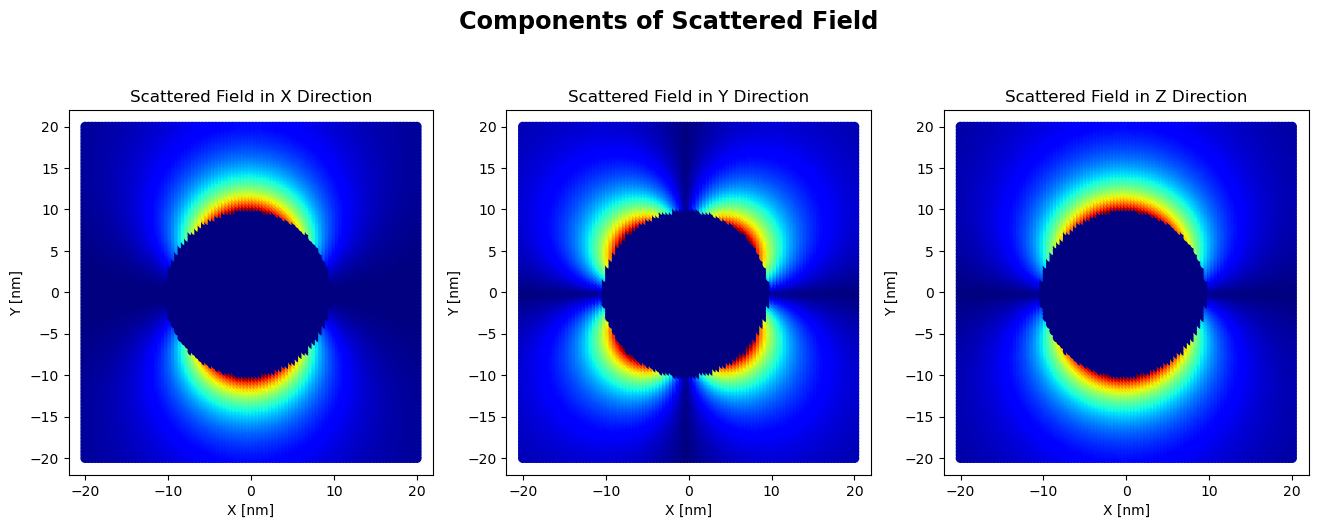

(array([0.08400646, 0.08472233, 0.08537044, ..., 0.08537044, 0.08472233,
        0.08400646]),
 array([0.08607167, 0.08857819, 0.0911196 , ..., 0.0911196 , 0.08857819,
        0.08607167]),
 array([7.45342798e-18, 7.59339765e-18, 7.73279520e-18, ...,
        7.73279520e-18, 7.59339765e-18, 7.45342798e-18]))

In [21]:
scattered_field_components(x_points, y_points, 1e-15, m_gold, ref_lam_gold, a, lam_value = 0.52, plot = True)